## About The Data - Attributes Description: 
### Input variables:

**bank client data**:  
1 - age: (numeric)  
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education: (categorical: primary, secondary, tertiary and unknown)  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
**Related with the last contact of the current campaign**:  
8 - contact: contact communication type (categorical: 'cellular','telephone')   
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

**other attributes**:  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

** social and economic context attributes**:  
12 - emp.var.rate: employment variation rate - quarterly indicator (numeric) 
13 - cons.price.idx: consumer price index - monthly indicator (numeric) )  
14 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   
15 - euribor3m: euribor 3 month rate - daily indicator (numeric)  

16 - nr.employed: number of employees - quarterly indicator (numeric) 
**Output variable (desired target)**:  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Importing Standard Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True) 
sns.set(font_scale=1)

from IPython.display import display 
pd.options.display.max_columns = None  # To display all columns in the notebook
from IPython.display import Image as PImage # To display all images inside the notebook

# Displaying graphs in the notebook itself
%matplotlib inline 

### Loading Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [2]:
def load(filename):
    data = pd.read_csv(filename, sep = ';')
    data.rename(columns = {'y': 'response'}, inplace = True)
    return data

In [3]:
file = "C:/Users/hp/Desktop/UpGrad/bank-additional/bank-additional-full.csv"
df = load(file)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploring the Basics
Gaining the descriptive satistics for the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
# getting descriptive statistics for continous variables
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# getting descriptive statistics for categorical variables
cat_attributes = [col for col in df.columns if type(df['%s'%col][0])==str]
df[cat_attributes].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,response
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


#### Correlation between Continous Variables

Checking the correlation of continuos/numerical variables with target variables

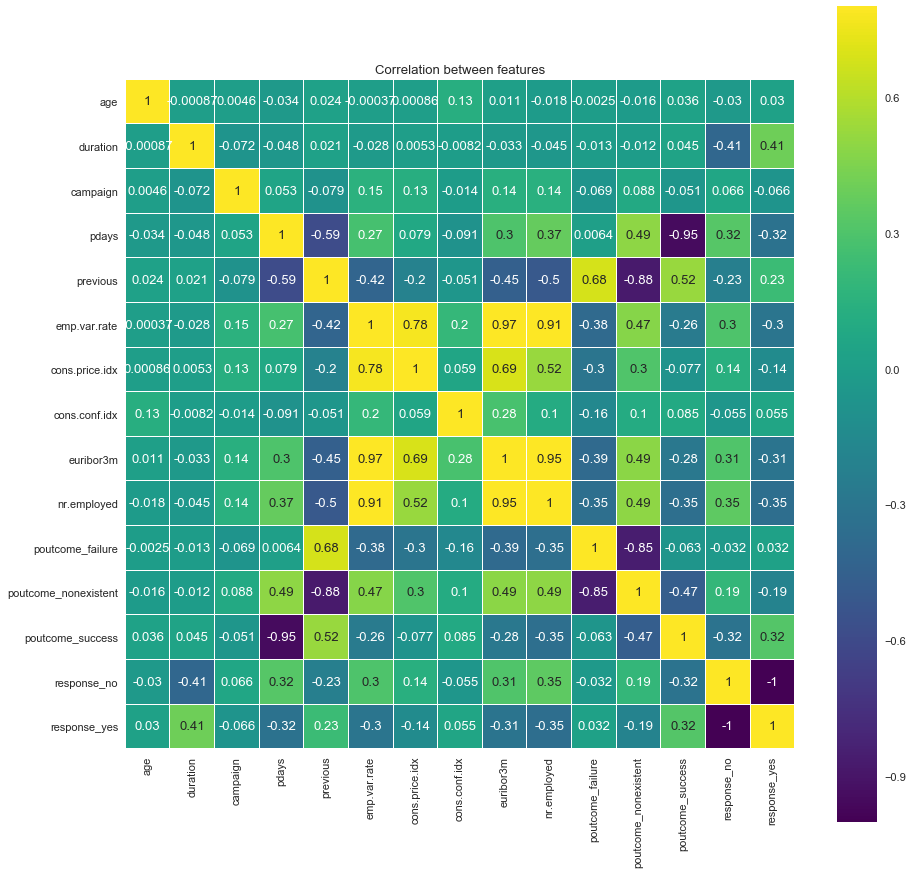

In [7]:
# correlation between variables 
# heat map
df_with_dummies = pd.get_dummies(df.drop([col for col in cat_attributes if col not in ['response', 'poutcome']], axis=1))
corrMatrix = df_with_dummies.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

**Inferences**:  
From the above heat map we can see that **''response_yes'**' (our target variable) has good correlation with **'previous'**, **'emp.var.rate'**, **'euribor3m'**, **'nr.employed'**, **'pdays_missing'**, **'poutcome_success'** and **'poutcome_nonexistent'**. We expect to see these independent variables as significant while building the models.

**Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".**

#### Distribution of Target variable of Present and Previous Campaign

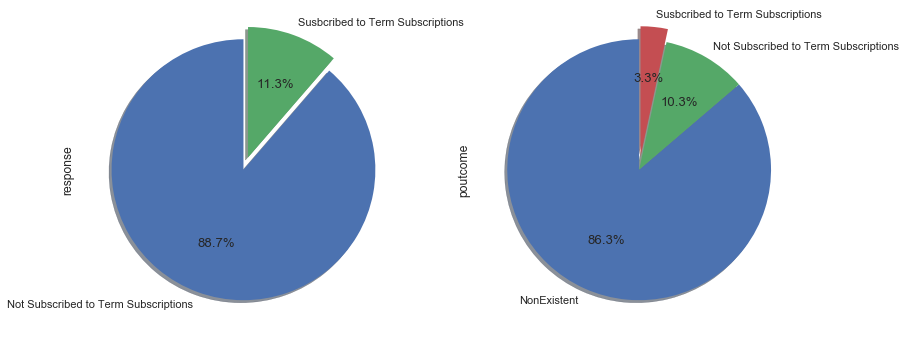

In [8]:
fig, axs = plt.subplots(1,2, figsize=(13,6))

labels = "Not Subscribed to Term Subscriptions", "Susbcribed to Term Subscriptions"
df.response.value_counts().plot.pie(explode = [0,0.1], labels = labels, 
                             ax=axs[0], autopct='%1.1f%%', shadow = True, startangle = 90)

labels = "NonExistent", "Not Subscribed to Term Subscriptions", "Susbcribed to Term Subscriptions"
df.poutcome.value_counts().plot.pie(explode = [0,0,0.1], labels = labels, 
                             ax=axs[1], autopct='%1.1f%%', shadow = True, startangle = 90)

plt.show()

## Exploratory Data Analysis

### Analysing the Categorical Variables
We first start the exploratory analysis of the categorical variables and see what are the categories and are there any missing values for these categories. Here, we used the seaborn package to create the bar graphs below.  
['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'response']

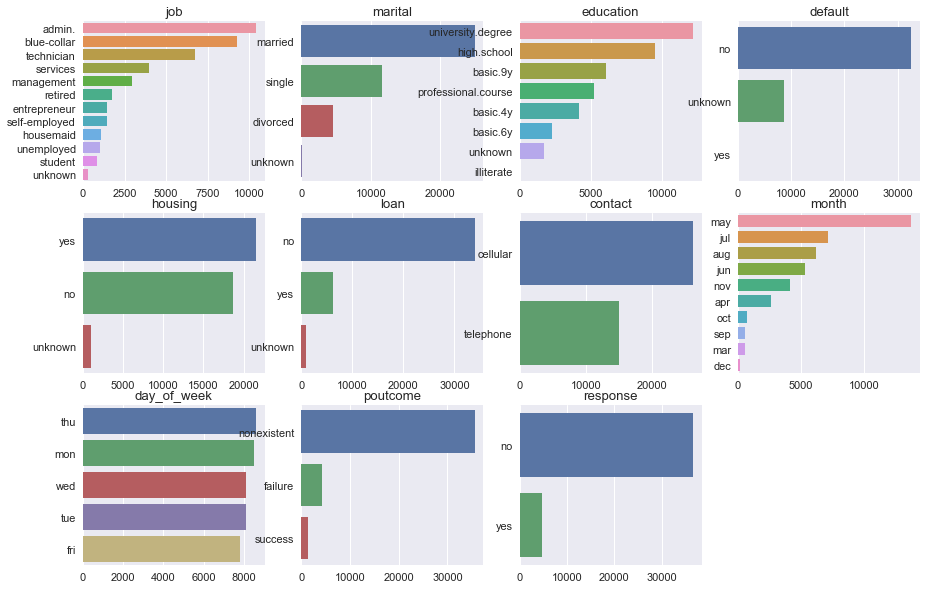

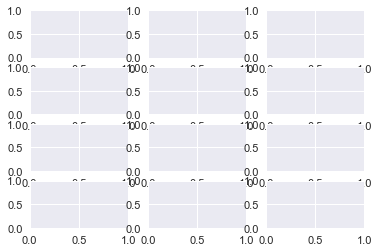

In [9]:
fig = plt.figure(figsize = (15,10))
ax = plt.subplots(4, 3)
for i, cat in enumerate(cat_attributes, 1):
    ax = fig.add_subplot(3, 4, i)
    sns.barplot(df[cat].value_counts().values, df[cat].value_counts().index, ax = ax)
    ax.title.set_text(cat)

There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

In [11]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


### Imputing unknown values with Intuition

Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

**Inferring education from jobs** : From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

**Inferring jobs from education** : If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

**Inferring jobs from age** : As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [12]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [13]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0
technician,58.0,873,87.0,384.0,3330.0,212.0,1809,0.0


As we can see, we are able to reduce the number of unknowns and enhance our data set.

### Relation of each variable with Duration

**Duration is obtained after the call is made to the potential client** so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


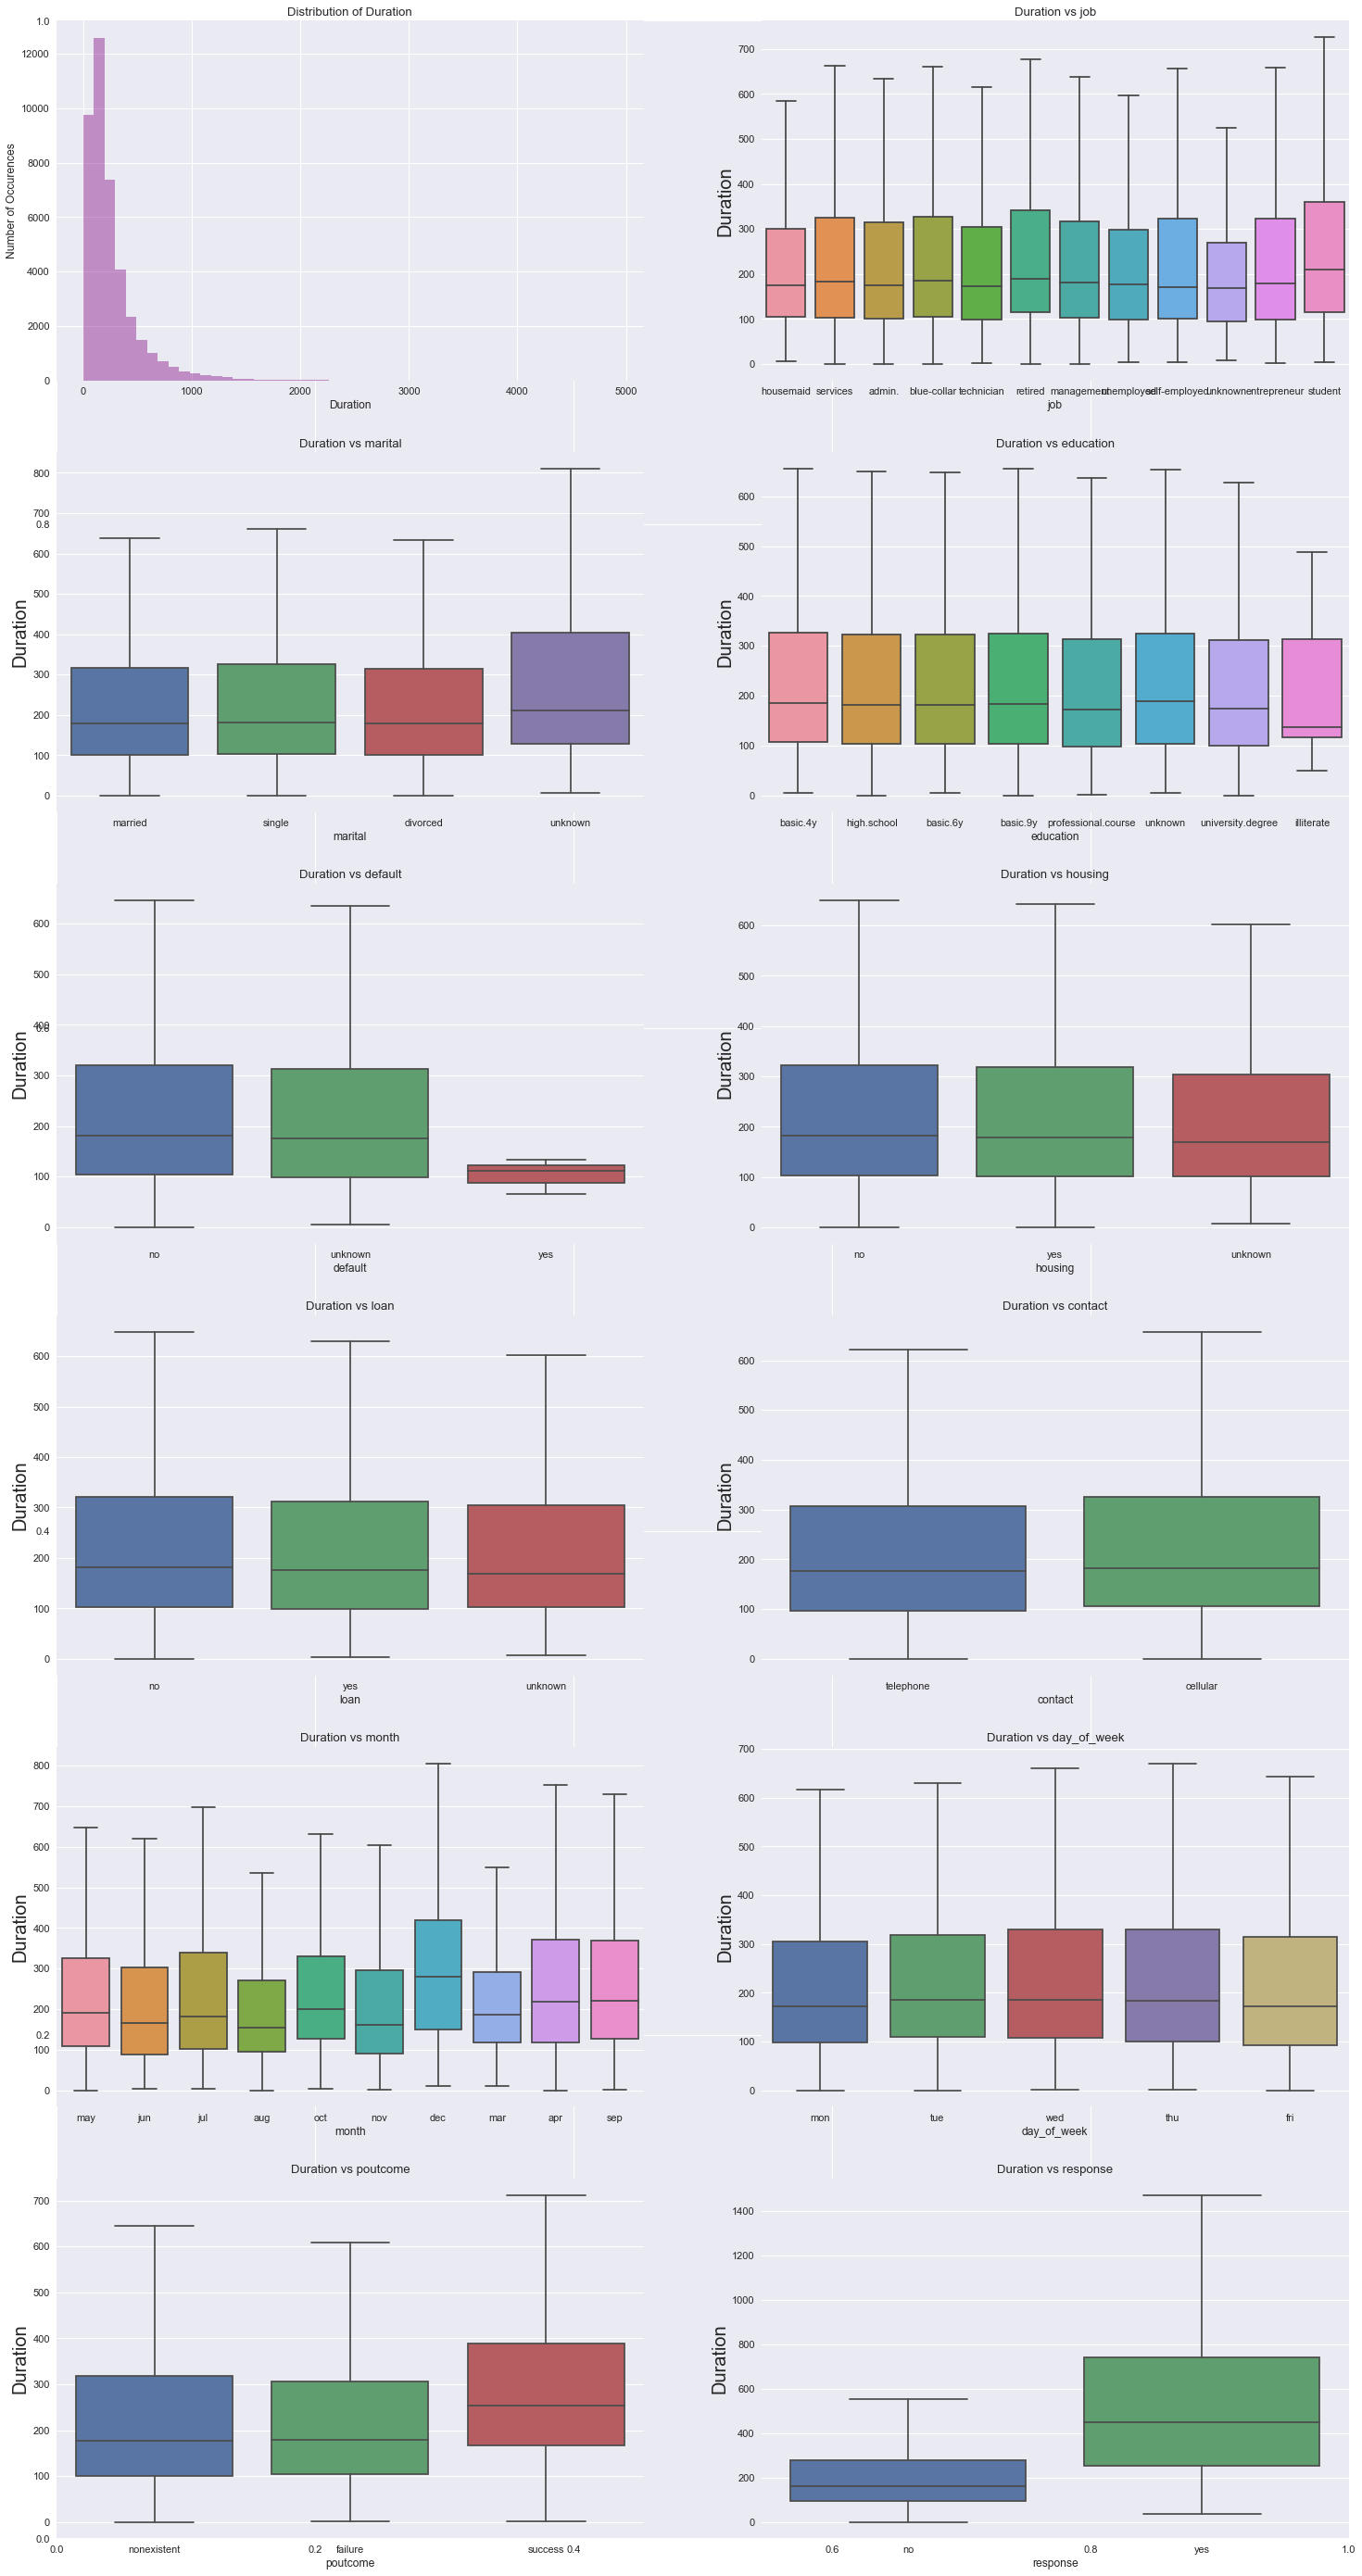

In [14]:
fig, ax = plt.subplots(figsize=(25,50))

ax = fig.add_subplot(6, 2, 1)
sns.distplot(df['duration'], color="purple", kde=False, ax = ax)
ax.title.set_text("Distribution of Duration")
ax.set_ylabel("Number of Occurences")
ax.set_xlabel("Duration");

for i, cat in enumerate(cat_attributes,1):
    # sns.boxplot(x, y, argument to hide outliers)
    ax = fig.add_subplot(6, 2, i+1)
    sns.boxplot(df[cat], df["duration"], showfliers=False, ax = ax)
    # title for the plot
    ax.title.set_text("Duration vs {}".format(cat))
    ax.set_ylabel("Duration", fontsize = 20)
    ax.set_label(cat)

### Insights
* **Job**: Students, Retired and Management people tend to stay longer on call.
* **Education**: Illiterate people do not stay on calls as much as literates
* **Marital**: No useful Insights
* **Default**: It can be seen that people having no default have more time to listen to the marketing calls.
* **Housing**: Housing loans have no relation with call duration 
* **Loan**: People having no loans stay longer on calls
* **Contact**: calls on cellular phones lasted longer
* **Month**: Highest call durations were recorded in the month of Dec. Must be beacause of festival and holiday seasons.
* **Day_of_week**: A pattern shows longer call duration in mid week and short durtion at extremes.

### Relating Target Variable(Response) with categorical variables
### List of normalized relative frequency of the target class per category

Normalized distribution of each class per feature and plotted difference between positive and negative frequencies. Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the product.

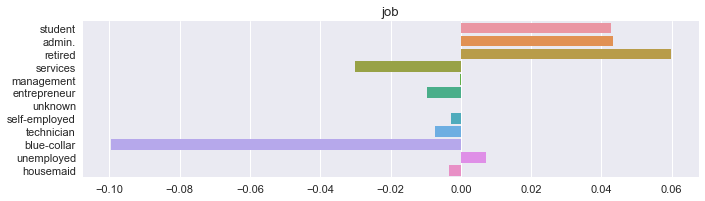

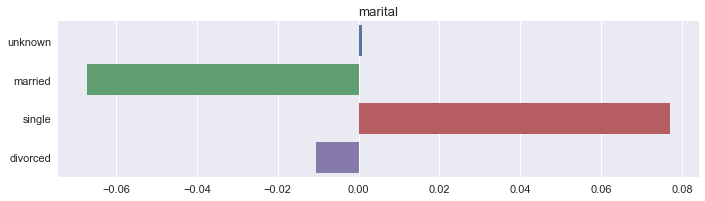

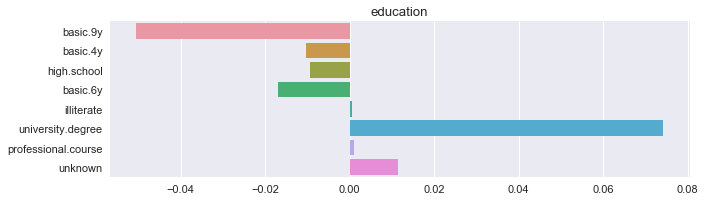

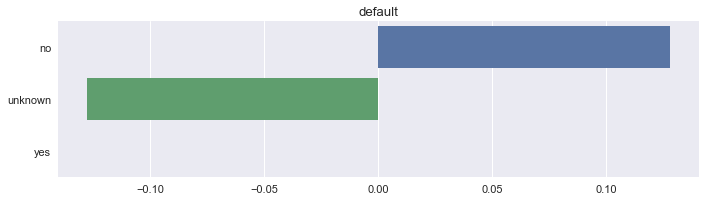

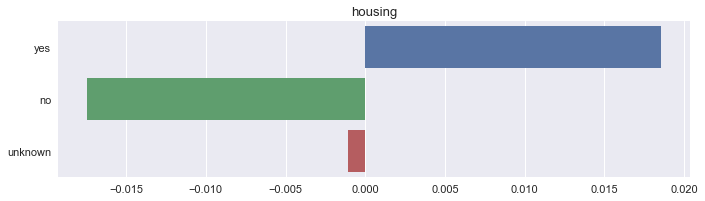

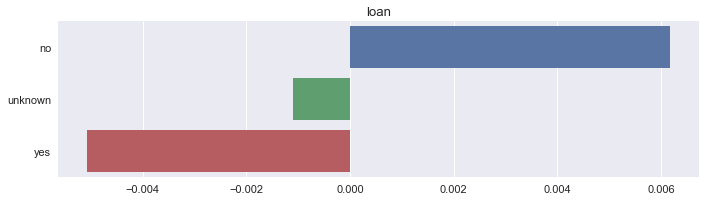

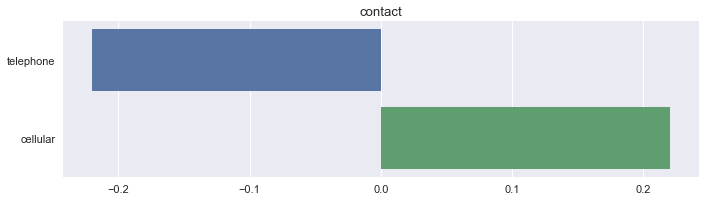

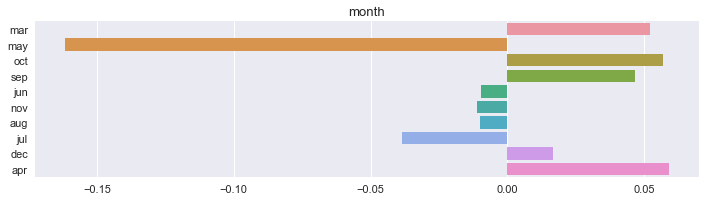

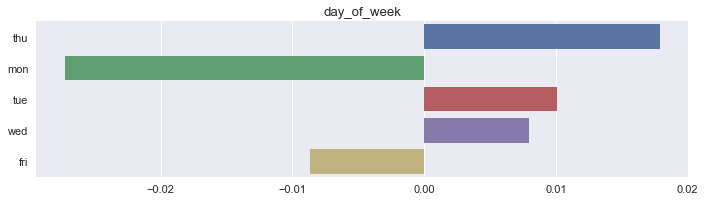

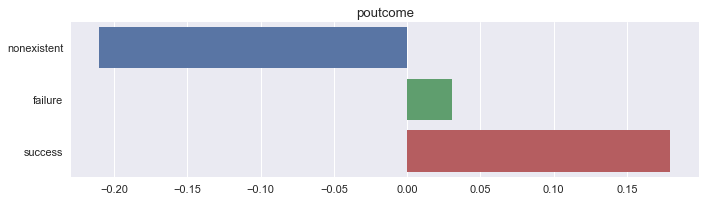

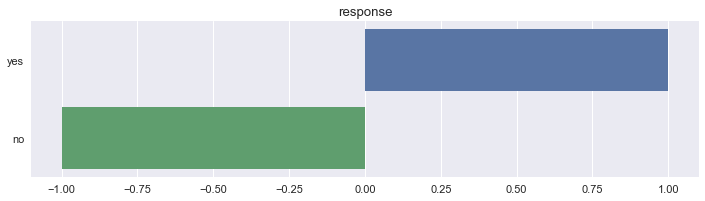

In [15]:
for col in cat_attributes:
    plt.figure(figsize=(10,3))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.response.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.response.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.response.values == 'yes').sum()
    freq_neg = (df.response.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

### Insights
Though these scores give direct and precise insights of the data with respect to the Target Variable (response), we cannot rely fully on these scores as many of the values are below 0.1.
* **Job**: Students, Retired and admin are more likely to subscribe to term deposits than other professions, but their normalized score is low. Bule-collar people are unlikely to subscribe.
* **Education**:People having university degree are more likely but with low normalized score.
* **Marital**: Single people are more likely but with low normalized score.
* **Default**: People having no default are strongly likely to subscribe to term deposits.
* **Housing**: No useful insights. 
* **Loan**: People having no loans are likely but with less normalized score.
* **Contact**: People called on cellular phones are strongly likely to subscribe to term deposits.
* **Month**: Calling in the month of may makes it highly unlikely for the user to subscribe.
* **Day_of_week**: Shoews the same pattern in favour of the Relation with duration.

### Model Building and Evaluation

### Applying different Models and selecting the best
We will apply different tree base models and see which model accurately predicts the customer response. Then on the basis of that model we will evalute the feature importances with respect to the target variable.  
Reasons for applying tree based models:  
* The data consists of both categorical and numeric variables.
* Tree based models are quick learners over large datasets
* They do not require feature scaling
* We can plot feature importances which is our main goal

### Label Encoding of categorical variables

In [16]:
def preprocess(df):
    data = df
    for col in cat_attributes:
        data[col] = data[col].astype('category').cat.codes
    return data
        
data = preprocess(df)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
# taking larger chunk for training as our goal is determining feature importances
train, test = train_test_split(data, train_size=0.8, random_state=5)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
x_train = train.drop(['response'], axis = 1).values
y_train = train['response'].values

x_test = test.drop(['response'], axis = 1).values
y_test = test['response'].values

### Comparing different classifiers

We are comparing the classifiers on the basis of thier classification accuracy score.

In [19]:
# classifiers 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

clf1 = RandomForestClassifier(n_estimators =  100,  n_jobs=-1, random_state = 5)
clf2 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, random_state = 5)
clf3 = XGBClassifier(nthreads = -1, random_state = 5)
clf4 = AdaBoostClassifier(random_state = 5)

classifiers = [('RF', clf1), ('GB', clf2), ('XB', clf3), ('AB', clf4)]

In [20]:
for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    print("{:3} classifier:\n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f}"
        .format(clf_name, 
                clf.score(x_train, y_train), 
                clf.score(x_test, y_test)))

RF  classifier:
         	train accuracy: 1.00
         	test accuracy: 0.91
GB  classifier:
         	train accuracy: 0.92
         	test accuracy: 0.91
XB  classifier:
         	train accuracy: 0.92
         	test accuracy: 0.91
AB  classifier:
         	train accuracy: 0.91
         	test accuracy: 0.90


Looking at the training and test classification accuracy score we can say that:  
* Radom Forests, Gradient Boosting and Xgboost have given a very hish test accuracy
* There is overfitiing in Random forests model as it is giving 100% training accuracy.
* As the results are same for Gradient boosting and Xgboost we can use more advances XGboost to evaluate feature importances with respect to target variable.

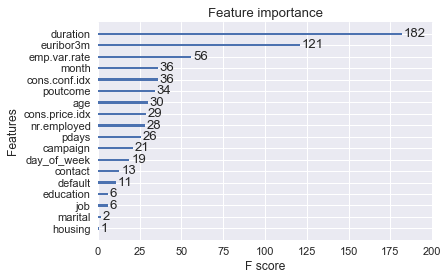

In [21]:
from xgboost import plot_importance

model = XGBClassifier(nthreads = -1, random_state = 5)
model.fit(train.drop(['response'], axis = 1), train['response'])

plot_importance(model)
plt.show()

The above **F_score** signifies how much change in variability of each attribute affects the valriability of **response**.  
Apart from duration, **'euribor3m'** and **'emp.var.rate'** have high scores which is in favour of the correlation heatmap results.

## Results on the basis of following Analysis Operations:

* Statistics and Correlations of Numerical variables with Response
* Data Cleaning and Analysis of each Categorical variable with call duration
* Analysis of each Categorical variable with Response
* Comparing the feature importances for best Fit Model

### Solutions the bank should consider for Next Marketing Campaign:

Mertics: Y%: Percentage of clients subscribed to term deposits.  
X%: percentage decrease in cost. The solutions are in order of higher to lower feature importances for features.

#### Based on Europe's Libor rate ('euribor3m'), employment variability index ('emp.var.rate') and consumer confidence index ('cons.price.idx')

1. The Bank must collaborate with economic experts to understand and gain control over the variation of Labour rates, employment variability index and consumer confidence index. They need to reach the customers before the competitors.  
Can lead to increase in Y.

#### Based on Month

2. **Months to target**:  We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers. For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

3. **Seasonal Variation**: Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.  
Can lead to increase in Y. Reducing the number of employees over campaign in off-season(summers) can lead to reduction in cost and increase in X.

#### Based on Age and Occupation

4. **Age Category to Target**: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. It will be great if for the next campaign the bank addressed these two categories and therefore, increase Y the likelihood of more term deposits suscriptions. 

#### Based on Campaign Call

5. **Low Campaign Calls**: Less number of calls (less than or equal to 2) can save both time and resources and increase X and do not reduce Y beacuse the more we call a potential client the more likely that he is not going to subscribe. There should be low variation in number of campaign calls per customer.

#### Based on Mode of Contact

6. **Cellular Phones**: We have seen that calls hon cellular phones resulted in more conversions(Y). These phones are carried by clients with them wherever they go. X can be increased as moblie plans are less costly than landline plans.

#### Based on Loans and Defaults:

7. **Target No Loans**: We have seen that people having no defaults and loans are more willing to subscribe than people who are already in debt. Targeting these segments will reduce both time, money and resources spent.

** By applying all these strategies it is likely that the next marketing campaign of the bank will be more effective than the current one.**